## 30 Seconds

In [1]:
import numpy as np
from scipy.signal import spectrogram
import pylab as plt
from sklearn.preprocessing import normalize

def to_Spectrogram(data):
    _ , _ , Sx = spectrogram(data, fs=300, nperseg=300, noverlap=150, scaling='spectrum', detrend=False, window='hanning')
    Sx = np.log10(Sx)
    tmp = np.transpose(Sx)
    tmp = normalize(tmp)
    return tmp


trainD = np.load("/home/hsiehch/30s/train_data.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")


print(trainD.shape)
trainData = [to_Spectrogram(data) for data in trainD]
trainData = np.asarray(trainData)
print('TrainD finished!')

print(validationD.shape)
validationData = [to_Spectrogram(data) for data in validationD]
validationData = np.asarray(validationData)
print('ValidateD finished!')

print(testD.shape)
testData = [to_Spectrogram(data) for data in testD]
testData = np.asarray(validationData)
print('testData finished!')

(5078, 9000)
TrainD finished!
(2032, 9000)
ValidateD finished!
(3041, 9000)
testData finished!


In [4]:
testData.shape

(2032, 59, 151)

In [2]:
trainData[0]

array([[-0.01374628, -0.01485853, -0.0218963 , ..., -0.09256703,
        -0.08755209, -0.08982192],
       [-0.04933405, -0.02344677, -0.02810613, ..., -0.10095904,
        -0.09068592, -0.08844197],
       [-0.02585168, -0.01992434, -0.02478334, ..., -0.10394462,
        -0.10833385, -0.1032963 ],
       ...,
       [-0.03103503, -0.0271825 , -0.03764773, ..., -0.09442293,
        -0.09368846, -0.09738212],
       [-0.03779204, -0.02776949, -0.02285491, ..., -0.10198658,
        -0.10665028, -0.11620187],
       [-0.03607297, -0.02596847, -0.0289762 , ..., -0.0906738 ,
        -0.09707627, -0.11498379]])

In [4]:
np.set_printoptions(suppress=True)
tdd = normalize(trainData[0])
print(trainData[0])
print('---------')
print(tdd)

[[ -1.25212117  -1.35343361  -1.99448995 ...  -8.43174382  -7.97494334
   -8.18169685]
 [ -4.45267285  -2.11620138  -2.53673509 ...  -9.11211617  -8.18490905
   -7.98238051]
 [ -2.37882682  -1.83340306  -2.28051963 ...  -9.56480392  -9.9686933
   -9.50514665]
 ...
 [ -2.36135846  -2.06823127  -2.86449855 ...  -7.18434597  -7.12846222
   -7.40950167]
 [ -3.2201035   -2.36612327  -1.94737259 ...  -8.689855    -9.08722904
   -9.90108082]
 [ -3.21168923  -2.31205395  -2.57984222 ...  -8.07297283  -8.64300488
  -10.23736743]]
---------
[[-0.01374628 -0.01485853 -0.0218963  ... -0.09256703 -0.08755209
  -0.08982192]
 [-0.04933405 -0.02344677 -0.02810613 ... -0.10095904 -0.09068592
  -0.08844197]
 [-0.02585168 -0.01992434 -0.02478334 ... -0.10394462 -0.10833385
  -0.1032963 ]
 ...
 [-0.03103503 -0.0271825  -0.03764773 ... -0.09442293 -0.09368846
  -0.09738212]
 [-0.03779204 -0.02776949 -0.02285491 ... -0.10198658 -0.10665028
  -0.11620187]
 [-0.03607297 -0.02596847 -0.0289762  ... -0.0906738 

In [2]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Input, LSTM
from keras.utils import np_utils
import tensorflow as tf
np.set_printoptions(suppress=True)

# trainD = np.load("/home/hsiehch/30s/2D_spect/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
# validationD = np.load("/home/hsiehch/30s/2D_spect/validate_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
# testD = np.load("/home/hsiehch/30s/2D_spect/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = np.append(trainData, validationData, axis=0)
trainL = np.append(trainL, validationL, axis=0)
# trainD = np.append(trainD, testD, axis=0)
# trainL = np.append(trainL, testL, axis=0)

# trainData = trainData.reshape((trainData.shape[0], trainData.shape[1], trainData.shape[2], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
# validationData = validationData.reshape((validationData.shape[0], validationData.shape[1], validationData.shape[2], 1))
# validationLabel = np_utils.to_categorical(validationL, 4)
# testData = testData.reshape((testData.shape[0], testData.shape[1], testData.shape[2], 1))
testLabel = np_utils.to_categorical(testL, 4)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
# print('Vali Data: ', validationData.shape)
# print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

Train Data: (7110, 59, 151)
Train Label:  (7110, 4)
Test Data:  (2032, 59, 151)
Test Label:  (3041, 4)


In [5]:
trainData[0]

array([[[0.0000284 ],
        [0.00040413],
        [0.00017036],
        ...,
        [0.00079824],
        [0.00081997],
        [0.00137198]],

       [[0.08163834],
        [0.00655209],
        [0.00328349],
        ...,
        [0.00621968],
        [0.0051876 ],
        [0.00328966]],

       [[0.00418929],
        [0.00134637],
        [0.00036346],
        ...,
        [0.00434273],
        [0.00513745],
        [0.00102066]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.00000001],
        [0.00000001]],

       [[0.00000001],
        [0.        ],
        [0.        ],
        ...,
        [0.00000002],
        [0.00000001],
        [0.        ]],

       [[0.00000001],
        [0.        ],
        [0.        ],
        ...,
        [0.00000001],
        [0.        ],
        [0.        ]]])

In [4]:
# from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.optimizers import Adam

# model = VGG16(include_top=True, input_shape = (trainData.shape[1], trainData.shape[2], 1),  weights=None, classes=4)
# x = base_model.output
# predictions = Dense(1024, activation='relu')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

img_input = Input(shape=(trainData.shape[1], trainData.shape[2], 1))
# Block 1
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1')(x)
x = Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1')(x)
x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2')(x)
x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',)(x)
x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',)(x)
x = Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',)(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)


x = Flatten(name='flatten')(x)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(256, activation='relu', name='fc3')(x)
x = Dense(4, activation='softmax', name='predictions')(x)
model = Model(img_input, x, name='vgg')

adam = Adam(lr = 0.001 )
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 59, 151, 1)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 59, 151, 64)       640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 59, 151, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 29, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 29, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 29, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 37, 128)       0         
__________

In [4]:
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(1024, input_shape = (trainData.shape[1], trainData.shape[2])))
# model.add(LSTM(100))
# model.add(Dense(100))
# model.add(Dense(50))
model.add(Dense(4, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1024)              4816896   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 4,820,996
Trainable params: 4,820,996
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(optimizer = 'RMSprop', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 50
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=80,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*1, 
                          verbose=1)

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

Train on 5078 samples, validate on 2032 samples
Epoch 1/80
5078/5078 [==============================] - 16s 3ms/step - loss: 0.9998 - acc: 0.5868 - val_loss: 0.9920 - val_acc: 0.5866
Epoch 2/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9955 - acc: 0.5868 - val_loss: 0.9995 - val_acc: 0.5866
Epoch 3/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9941 - acc: 0.5868 - val_loss: 0.9926 - val_acc: 0.5866
Epoch 4/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9934 - acc: 0.5868 - val_loss: 0.9916 - val_acc: 0.5866
Epoch 5/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9928 - acc: 0.5868 - val_loss: 1.0050 - val_acc: 0.5866
Epoch 6/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9922 - acc: 0.5868 - val_loss: 0.9942 - val_acc: 0.5866
Epoch 7/80
5078/5078 [==============================] - 14s 3ms/step - loss: 0.9920 - acc: 0.5868 - val_loss: 0.9898 - val_acc: 0.5866
Epoch 8

KeyboardInterrupt: 

In [ ]:
model.save('2D_model_30s.h5')
print('Finished!')

In [ ]:
del model
print("Deleted!")

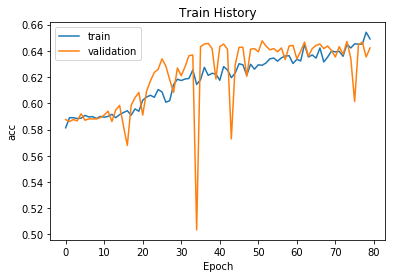

In [14]:
show_plot('acc', train_history)

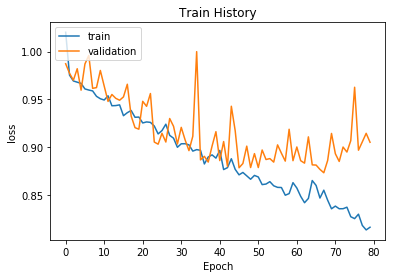

In [15]:
show_plot('loss', train_history)